# 8. Probability Distributions and Random Variables in R

In this chapter, we will cover how to generate random variables in R from known probability distributions and empirical distributions. All of the common probability distributions have a set of four functions in R to generate random variables from that distribution and calculate the corresponding density, quantile, and cumulative functions. Additionally, we will cover creating confidence intervals.  

In [1]:
library(tidyverse)
library(RforHDSdata)
data(NHANESsample)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Below we will generate random variables and sample random subsets from our data. Anytime we do something where the outcome has some randomness, we are using R's random number generator under the hood. This means that the results will change every time we run our code. In order to make sure our code is replicable, we set a random seed. This means that the results will be the same every time. The `set.seed()` function takes in a numeric seed value. You can use any number as the seed. 

In [2]:
set.seed(5)

## Probability Distributions in R

All of the common discrete (e.g. bernoulli, binomial) and continuous (e.g. normal, uniform, exponential, poisson) probability distributions have corresponding functions in R. For each of these distributions, there are four available functions:  

  -  `r[dist]()`: generates random variables (e.g. `rnorm()`, `runif()`)  
  -  `d[dist]()`: density function (e.g. `dnorm()`, `dunif()`)  
  -  `p[dist]()`: cumulative distribution function (e.g. `pnorm()`, `punif()`)  
  -  `q[dist]()`: quantile function (e.g. `qnorm()`, `qunif()`)  
  
Let's see how these work in practice, using the normal and binomial distributions as examples. The code below generates 100 random variables following a normal distribution with mean 5 and standard deviation 1. As you can see, the function takes in `n` (the number of observations), `mean` (the mean with default value 0), and `sd` (the standard deviation with default value 1). A histogram plot (using the built-in `hist` function) shows that the generated values look roughly normally distributed.

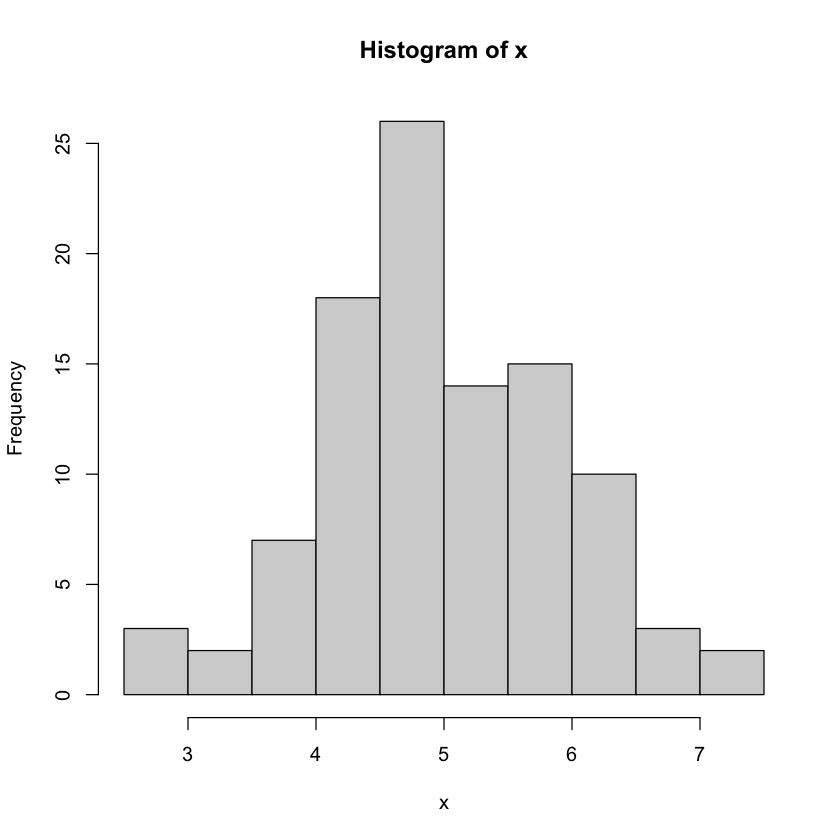

In [3]:
x <- rnorm(n = 100, mean = 5, sd = 1)
hist(x)

We can also input a vector for `mean` or `sd` if we want each observation to come from its own normal distribution. Below, we generate 100 observations with the default standard deviation of 1 where half of the observations have mean 0 and the other half have mean 5.

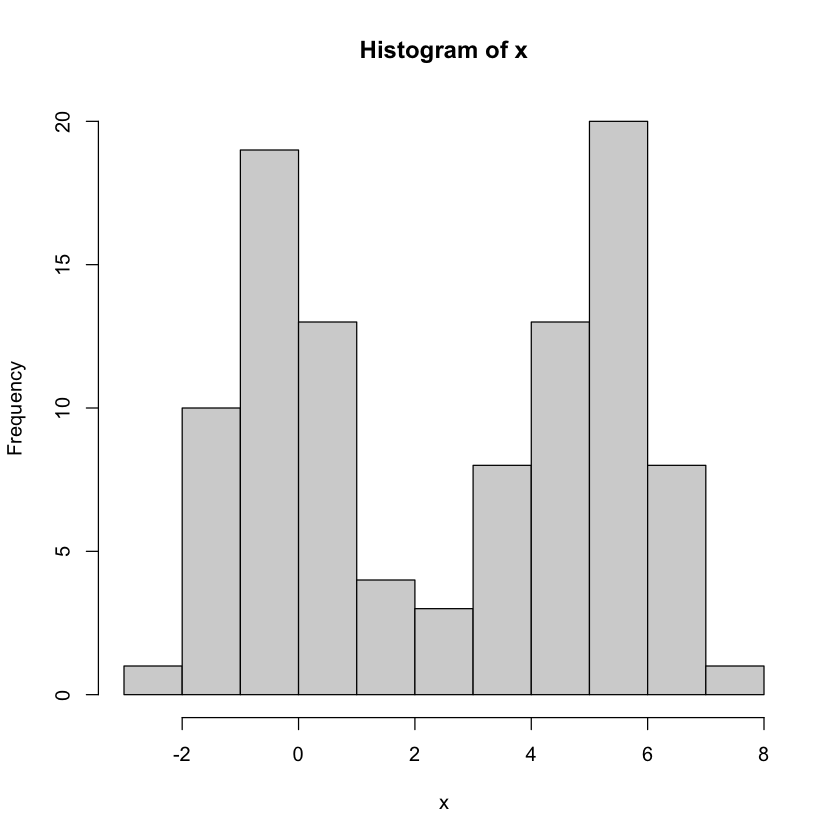

In [4]:
x <- rnorm(n = 100, mean = rep(c(0,5),50))
hist(x)

Next, we look at the density function. Recall that the probability density function for a normal distribution with mean $\mu$ and standard deviation $\sigma$ is given by the formula below. 
$$ f_X(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp \left(-\frac{1}{2} \left (\frac{x-\mu}{\sigma} \right)^2 \right) $$
Below, we can compare some of the values from the `dnorm()` function to this equation and see that they are in fact equal. You can also specify the mean and standard deviation in this function, but we will use the default values (mean = 0 and sd = 1).

In [5]:
dnorm(0) == 1/sqrt(2*pi)
dnorm(1) == exp(-1/2)/sqrt(2*pi)
dnorm(1) == 1/sqrt(2*pi*exp(1))

[1] TRUE

[1] TRUE

[1] TRUE

Next, we take a look at the cumulative distribution and quantile distribution functions. The cumulative distribution function `pnorm()` takes in a value `x`, a `mean`, and a `sd` and returns the probability that a random variable following a $N(mean, sd)$ distribution is less than `x`. For example, for `x` equal to the mean, this will be a fifty percent probability because the normal distribution is symmetric (so its mean is also its median). Below, we verify this for two different values of the mean.

In [6]:
pnorm(0)
pnorm(5, mean = 5, sd = 1)

[1] 0.5

[1] 0.5

The quantile distribution function is the inverse of the cumulative distribution. This function takes in a probability `x`, a `mean`, and a `sd` and returns the value for which the cumulative distribution function is equal to `x`. Thus, when `x` is equal to 0.5, the `qnorm()` function returns the mean of the distribution.

In [7]:
qnorm(0.5)
qnorm(0.5, mean = 5, sd = 1)

[1] 0

[1] 5

The examples above used the normal distribution, but these four functions can be used very similarly for other distributions. For the binomial distribution, the difference is that we need to specify a probability `p` and number of trials `size` (rather than `mean` and `sd` in the normal case) to specify the distribution. Below, we generate 100 binomial random variables with 10 trials and probability 0.5.

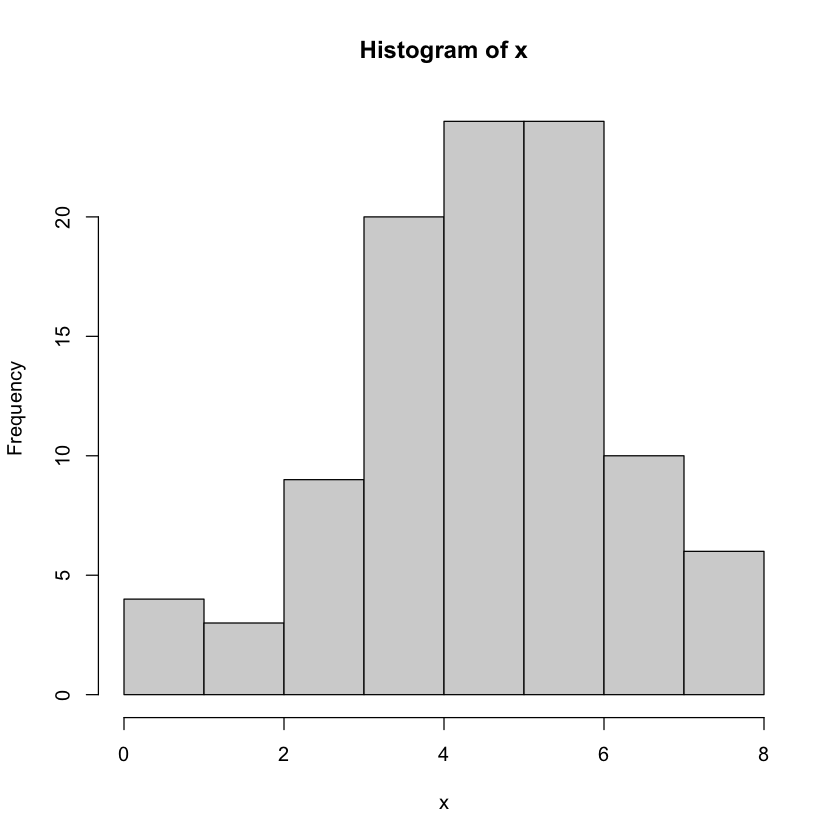

In [8]:
x <- rbinom(n = 100, p = 0.5, size = 10)
hist(x)

In terms of the density function for the binomial distribution, `dbinom()` will correspond to the density function given below. Note that x must be a positive integer value.
$$ P(X = x) = \binom{size}{x} p^x (1-p)^{size-x}. $$

In [9]:
dbinom(3, size = 10, p = 0.5)

[1] 0.1171875

Further, the quantile and probability density functions work as above, but we have to consider the fact that the binomial distribution is discrete (it can only take integer values, rather than the entire real line). This means that, for example, the `pbinom()` function will return the same value for 3, 3.5, 3.6, all the way up to, but not including, 4 - this is because the binomial distribution can take the value 3 and the value 4, but nothing in between these two values, so $P(X \leq 3) = P(X \leq 3.2) = P(X \leq 3.5) = P(X \leq 3.6)$ and so on. In particular, the `qbinom()` function returns the largest integer value for which the probability of being less than or equal to that value is at most the inputted value x.

In [10]:
pbinom(3, size = 10, p = 0.5)
pbinom(3.5, size = 10, p = 0.5)
pbinom(4, size = 10, p = 0.5)

qbinom(0.2, size = 10, p = 0.5)
qbinom(0.3, size = 10, p = 0.5)

[1] 0.171875

[1] 0.171875

[1] 0.3769531

[1] 2

[1] 3

### Reference List for Probability Distributions

The other probability distributions available in R are given below. For each distribution, we have given the arguments for the `r[dist]()` function. The other three functions have a similar format. Unless otherwise stated, the parameter `n` is the number of observations.

* **Beta**: `rbeta(n, shape1, shape2, ncp = 0)` with shape parameters `shape1` and `shape2` (and optional non-centrality parameter `ncp`).
* **Binomial**: `rbinom(n, size, prob)` with probability of success `prob`  and number of trials `size`
* **Cauchy**: `rcauchy(n, location = 0, scale = 1)` with location parameter `location` and scale parameter `scale`.
* **Chi-Square**: `rchisq(n, df, ncp = 0)` with `df` degrees of freedom and optional non-centrality parameter `ncp`.
* **Exponential**: `rexp(n, rate = 1)` with rate `rate` (i.e., mean 1/rate).
* **F**: `rf(n, df1, df2, ncp)` with `df1` and `df2` degrees of freedom (and optional non-centrality parameter `ncp`).
* **Gamma**: `rgamma(n, shape, rate = 1, scale = 1/rate)` with parameters `shape` and `scale` (or alternatively specified by `rate`).
* **Geometric**: `rgeom(n, prob)` with probability parameter `prob`.
* **Hypergeometric**: `rhyper(nn, m, n, k)` with `m` white balls, `n` black balls, and `k` balls chosen.
* **Logistic**: `rlogis(n, location = 0, scale = 1)` with parameters `location` and `scale`.
* **Log Normal**: `rlnorm(n, meanlog = 0, sdlog = 1)` with mean `meanlog` and standard deviation `sdlog` on the log scale.
* **Negative Binomial**: `rnbinom(n, size, prob, mu)` with parameters `size` and `prob`.
* **Normal**: `rnorm(n, mean = 0, sd = 1)` with mean equal to `mean` and standard deviation equal to `sd`.
* **Poisson**: `rpois(n, lambda)` with parameter `lambda`.
* **Student t**: `rt(n, df, ncp)` with `df` degrees of freedom (and optional non-centrality parameter `ncp`).
* **Uniform**: `runif(n, min = 0, max = 1)` with minimum value `min` and maximum value `max`.
* **Weibull**: `rweibull(n, shape, scale = 1)` with parameters `shape` and `scale`.
* **Wilcoxon Rank Sum**: `rwilcox(nn, m, n)` with `nn` number of observations and sample sizes `m` and `n`.
* **Wilcoxon Signed Rank**: `rsignrank(nn, n)` with `nn` number of observations and sample size `n`.

### Practice Question 1
Generate 5 random numbers following a [uniform distribution](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/Uniform) with min 1 and max 5. Call this vector `x_unif`. Then, find the 0.15 quantile for this same distribution. Call this value `q_15`.

## Empirical Distributions and Sampling Data

In a previous chapter, we sampled from our data at the start of the chapter but didn't explain this process. That was  an example of sampling from an empirical distribution. We used the `sample(x, size, replace=FALSE, prob=NULL)` function, which takes in the values we want to sample from `x`, the number of observations we want to sample `size`, and whether we want to sample with replacement `replace`. If we don't want to sample such that each value has an equal probability of being chosen, we can also set a probability vector `prob`, which must have the same length as `x`. Below we sample 500 rows without replacement from the NHANES data. To do so, we select 500 values from the indices 1 to the number of rows in the data. We then select rows of the data using these indices.

In [11]:
nhanes_sample_ids <- sample(1:nrow(NHANESsample), 500, replace=FALSE)
nhanes_sample <- NHANESsample[nhanes_sample_ids, ]
dim(nhanes_sample)

[1] 500  21

Below, we now sample with replacement. By doing so, we create a new data set that is sampled from the empirical distribution of the data and that is called a *bootstrap sample*. 

In [12]:
nhanes_sample_ids <- sample(1:nrow(NHANESsample), nrow(NHANESsample), replace=TRUE)
nhanes_sample <- NHANESsample[nhanes_sample_ids, ]
dim(nhanes_sample)

[1] 31265    21

Another way to sample from a data frame is to use the `slice_sample()` function from the tidyverse. In this function, we can either specify the number of observations to sample `n` or the proportion of observations to sample `prop`. Additionally, we can sample with or without replacement by setting the value of the argument `replace` (with default value FALSE). We use this function below to randomly sample 20% of observations without replacement. 

In [13]:
nhanes_sample <- NHANESsample %>%
  slice_sample(prop = 0.2, replace = FALSE)
dim(nhanes_sample)

[1] 6253   21

### Practice Question 2

Beyond sampling, we can also find the empirical cumulative distribution. That is, we can use a given vector to infer a distribution. In the case below, we draw a random normal vector and plot it using the `ecdf()` function, which returns a function representing the empirical cumulative distribution. In red, we also plot the actual cdf using the `pnorm()` function. 

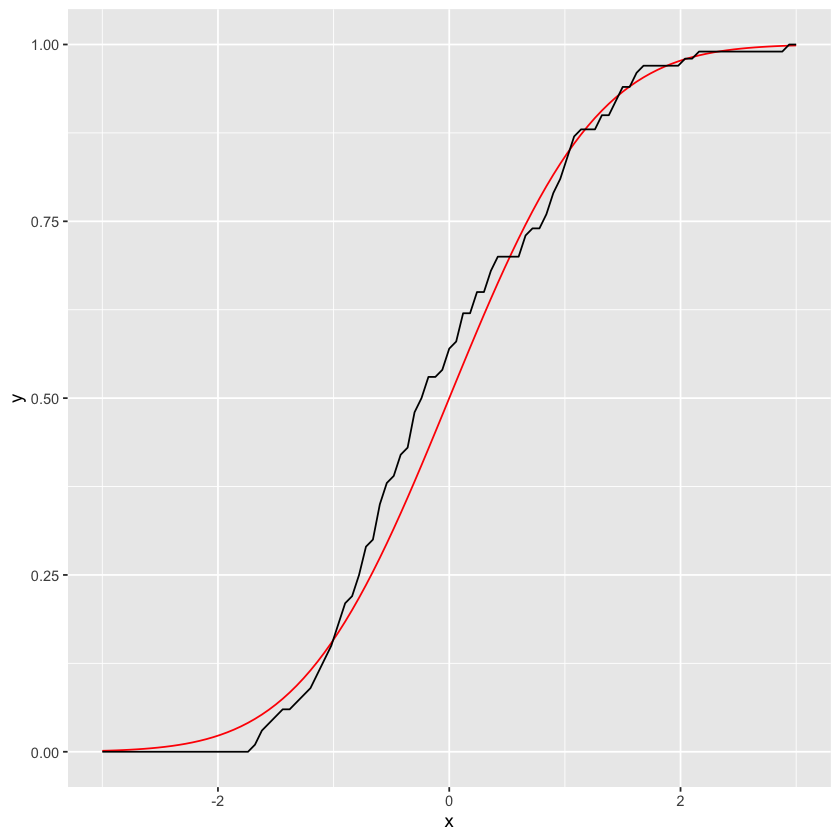

In [14]:
vec <- rnorm(100) #standard normal
ggplot(data.frame(x = c(-3, 3)), aes(x = x)) + 
  stat_function(fun = pnorm, color = "red") + 
  stat_function(fun=ecdf(vec))  + # the stat function geom lets you plot a function
  xlab("x")

In practice, the empirical cumulative distribution might involve data from a given data set that you want to use to represent the population's distribution. Below, we find the empirical distribution of blood lead level. A blood lead level of 5 µg/dL or above is considered elevated. We can see 96.4% of observations have a blood lead level below this threshold. 

In [15]:
ecdf_lead <- ecdf(nhanes_sample$LEAD)
ecdf_lead(5)

[1] 0.9609787

## Exercises


1. Assume the distribution of female heights is approximated by a normal distribution with a mean of 64 inches and a standard deviation of 3 inches. If we pick a female at random, what is the probability that she is 5 feet or shorter? If we pick a female at random, what is the probability that she is 6 feet or taller?




In [16]:
pnorm(5*12, mean = 64, sd = 3)

[1] 0.09121122

In [17]:
1-pnorm(6*12, mean = 64, sd = 3)

[1] 0.003830381

2. Compute the probability that the height of a randomly chosen female is within 1 SD from the average height.

In [18]:
# Assign a variable 'female_avg' as the average female height.
female_avg <- 64

# Assign a variable 'female_sd' as the standard deviation for female heights.
female_sd <- 3

# To a variable named 'taller', assign the value of a height that is one SD taller than average.
taller <- female_avg + female_sd

# To a variable named 'shorter', assign the value of a height that is one SD shorter than average.
shorter <- female_avg - female_sd

# Calculate the probability that a randomly selected female is between the desired height range.

pnorm(taller, female_avg,female_sd) - pnorm(shorter, female_avg,female_sd)

[1] 0.6826895

3. The distribution of IQ scores is approximately normally distributed. The expected value is 100 and the standard deviation is 15. Suppose you want to know the distribution of the person with the highest IQ in your school district, where 10,000 people are born each year.

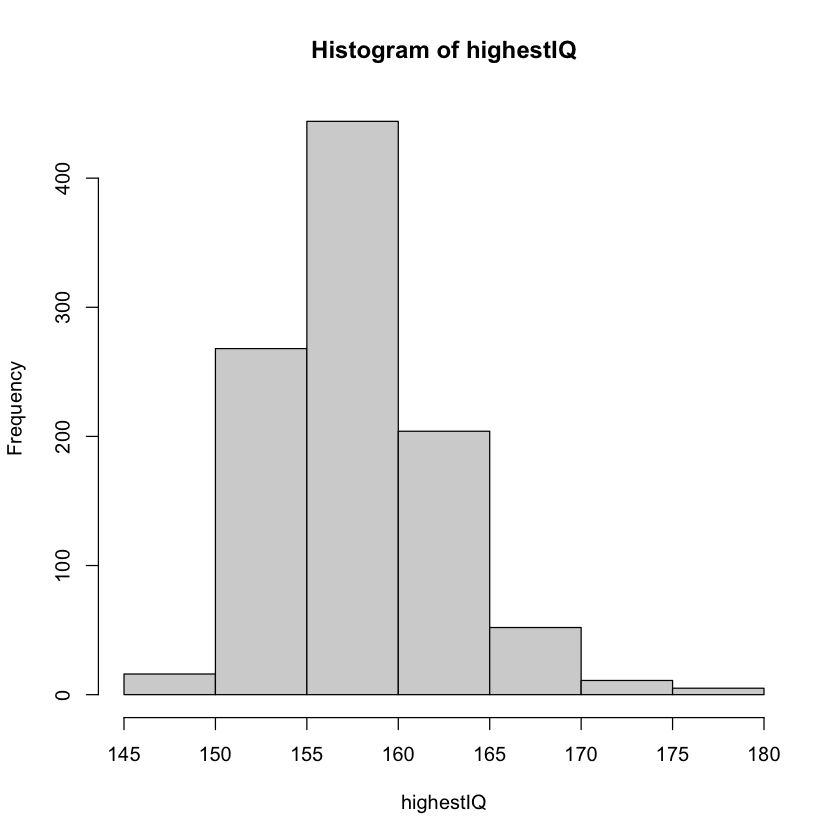

In [19]:
# Generate 10,000 IQ scores 1,000 times using simulation. Make a histogram of the highest IQ scores.
N <- 1000

# Use the `set.seed` function to make sure your answer matches the expected result after random number generation.
set.seed(12)

# Create an object called `highestIQ` that contains the highest IQ score from each random distribution of 10,000 people.
highestIQ <- replicate(N, {
    sim <- rnorm(10000,100,15)
    max(sim)
})

# Make a histogram of the highest IQ scores.
hist(highestIQ)